In [1]:
import sys
sys.path.append('/Users/erikweilandt/Library/Caches/pypoetry/virtualenvs/tepem-FeojsIC2-py3.11/lib/python3.11/site-packages')

In [2]:
from sympy import symbols, simplify, prod, plot, diff, expand, integrate, solveset
from sympy.plotting.plot import plot3d
import numpy as np

In [3]:
def LagrangPoly(y,order,i,yi=None):
    if yi==None:
        yi=symbols('y:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return prod([(y-yi[j])/(yi[i]-yi[j]) for j in index])

reference: https://www.longqi.cf/python/2014/03/24/implement-of-lagrange-polynomial-in-sympy/

In [4]:
test_order = 2
test_nodes = np.linspace(0,1, test_order+1)

In [5]:
x, y, s=symbols('x y s')
LagrangPoly(y,test_order,0)

(y - y1)*(y - y2)/((y0 - y1)*(y0 - y2))

## Define 1-D $\mathbb{P}_d$ shape functions in both directions

In [6]:
order_x = 2
order_y = 4

In [7]:
def get_chebby_points(start, end, num):
    ref_points = [-np.cos(np.pi * i / num) for i in range(num+1)]
    interval_points = [map_min1plus1_to_ab(x, start, end) for x in ref_points]
    return np.array(interval_points)

def map_min1plus1_to_ab(x,a, b):
    return (b-a)/2 * x + (a+b)/2

In [8]:
nodes_x = np.linspace(0,1, order_x+1)
nodes_y = np.linspace(0,1, order_y+1)

In [9]:
#nodes_x = get_chebby_points(0,1, order_x)
#nodes_y = get_chebby_points(0,1, order_y)

In [10]:
pols_x = {}
for i in range(order_x+1):
    pols_x[f"psi_{i}"] = simplify(LagrangPoly(x,order_x,i,list(nodes_x)))
pols_y = {}
for i in range(order_y+1):
    pols_y[f"xi_{i}"] = simplify(LagrangPoly(y,order_y,i,list(nodes_y)))
pols_x, pols_y

({'psi_0': 1.0*(x - 1)*(2.0*x - 1.0),
  'psi_1': 4.0*x*(1 - x),
  'psi_2': x*(2.0*x - 1.0)},
 {'xi_0': 1.0*(y - 1)*(1.33333333333333*y - 1.0)*(2.0*y - 1.0)*(4.0*y - 1.0),
  'xi_1': y*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0),
  'xi_2': 4.0*y*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0),
  'xi_3': y*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333),
  'xi_4': y*(10.6666666666667*y**3 - 16.0*y**2 + 7.33333333333333*y - 1.0)})

In [11]:
#for pol in pols_x.values():
#    plot(pol, (x,0,1))

In [12]:
#for pol in pols_y.values():
#    plot(pol, (y,0,1))

# $\mathbb{Q}_{x,y}$ shape functions

Below we are numerating such that we follow the numbering as indicated in the notes. This means we first number all shape functions for x=0 and at last all shape functions with x=1.

In [13]:
q_sf = {}
name_counter = 0
for x_sf in pols_x.values():
    for y_sf in pols_y.values():
        q_sf[f"phi_{name_counter}"] = x_sf * y_sf
        name_counter += 1
q_sf

{'phi_0': 1.0*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.33333333333333*y - 1.0)*(2.0*y - 1.0)*(4.0*y - 1.0),
 'phi_1': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0),
 'phi_2': 4.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0),
 'phi_3': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333),
 'phi_4': 1.0*y*(x - 1)*(2.0*x - 1.0)*(10.6666666666667*y**3 - 16.0*y**2 + 7.33333333333333*y - 1.0),
 'phi_5': 4.0*x*(1 - x)*(y - 1)*(1.33333333333333*y - 1.0)*(2.0*y - 1.0)*(4.0*y - 1.0),
 'phi_6': 4.0*x*y*(1 - x)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0),
 'phi_7': 16.0*x*y*(1 - x)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0),
 'phi_8': 4.0*x*y*(1 - x)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333),
 'phi_9': 4.0*x*y*(1 - x)*(10.6666666666667*y**3 - 16.0*y**2 + 7.33333333333333*y - 1.0),
 'phi_10': 1.0*x*(2.0*x - 1.0)*(y - 1)*(1

In [14]:
q_sf_velo = {}
name_counter = 0
for i, x_sf in enumerate(pols_x.values()):
    for j, y_sf in enumerate(pols_y.values()):
        if j%order_y != 0:
            q_sf_velo[f"phi_{name_counter}"] = x_sf * y_sf
            name_counter += 1
q_sf_velo

{'phi_0': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0),
 'phi_1': 4.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0),
 'phi_2': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333),
 'phi_3': 4.0*x*y*(1 - x)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0),
 'phi_4': 16.0*x*y*(1 - x)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0),
 'phi_5': 4.0*x*y*(1 - x)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333),
 'phi_6': x*y*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0),
 'phi_7': 4.0*x*y*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0),
 'phi_8': x*y*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333)}

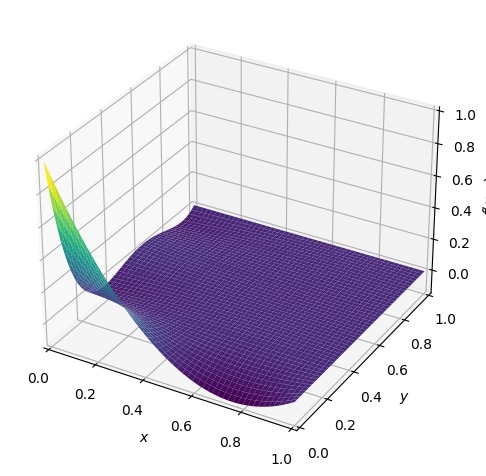

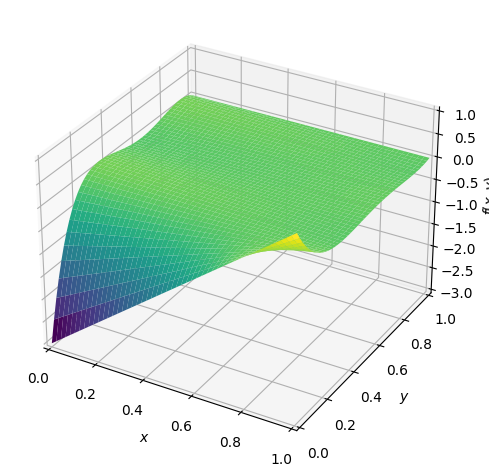

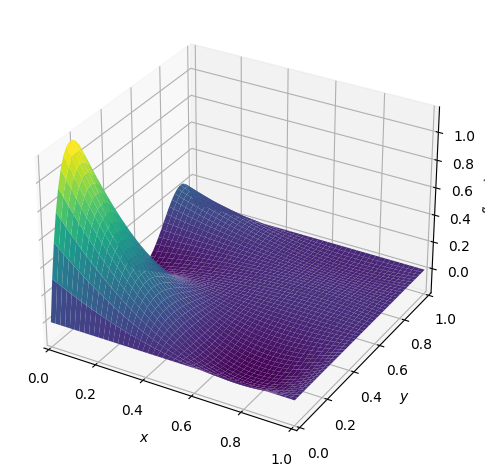

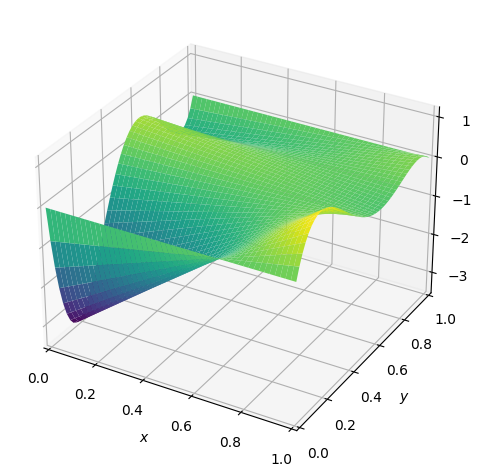

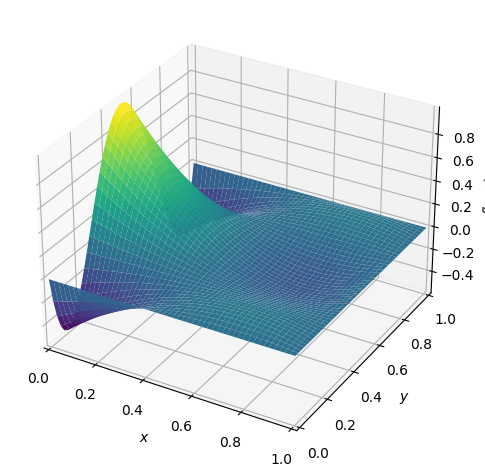

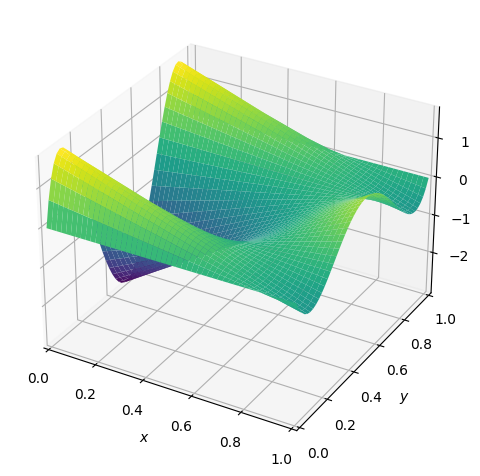

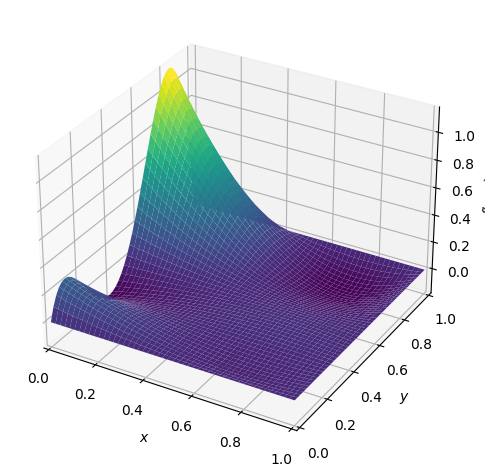

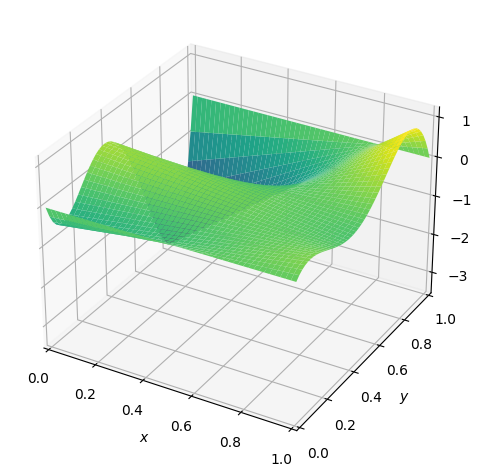

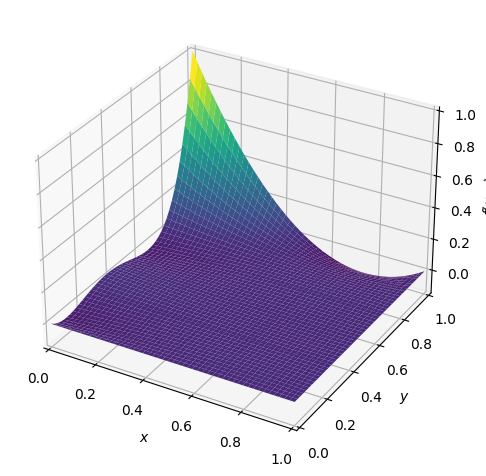

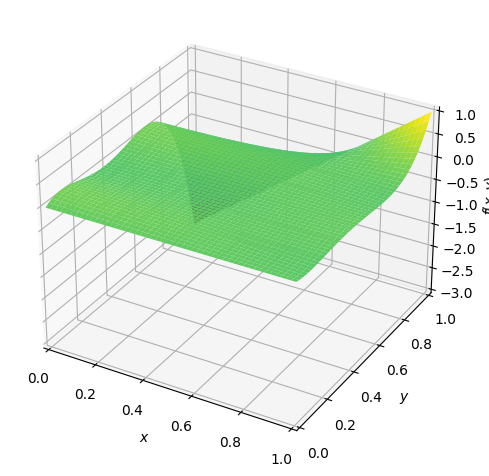

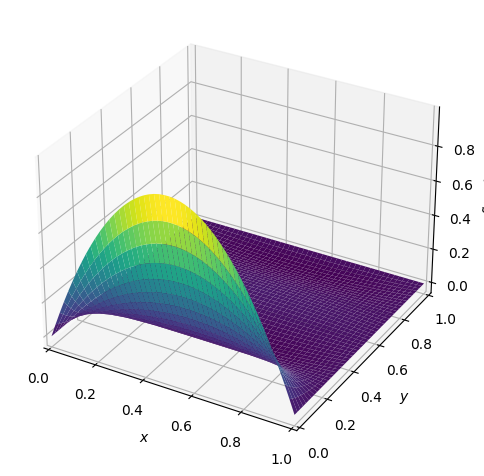

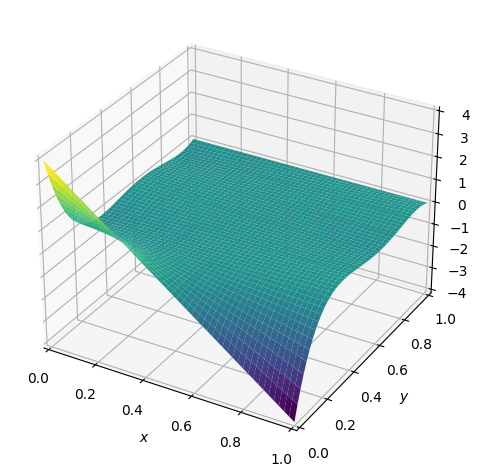

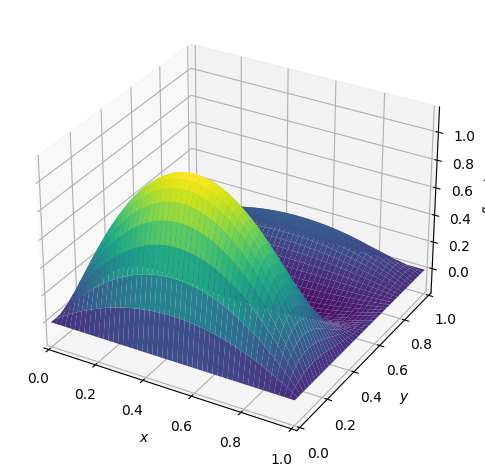

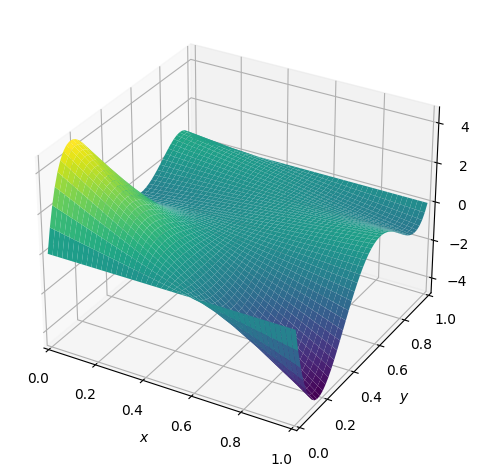

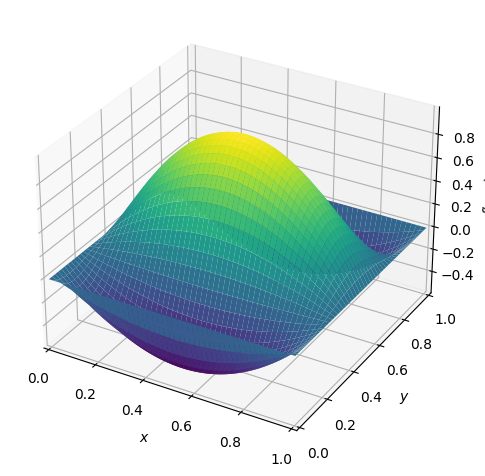

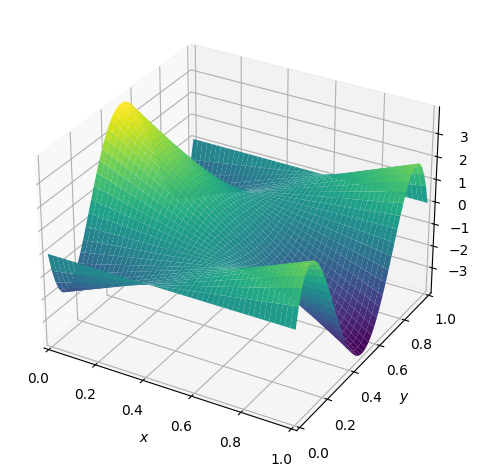

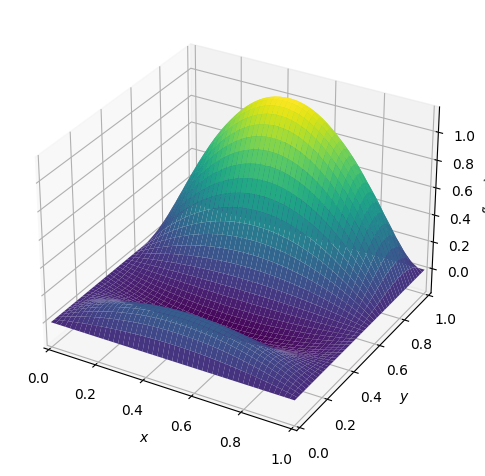

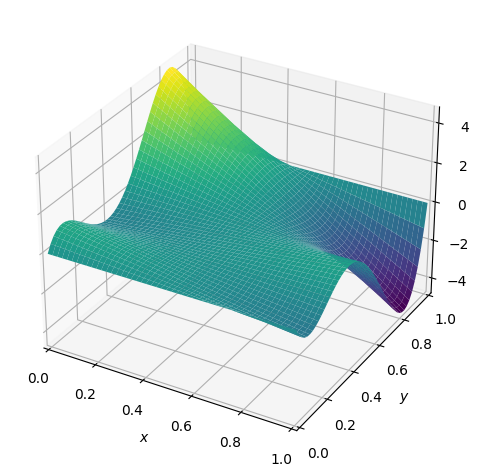

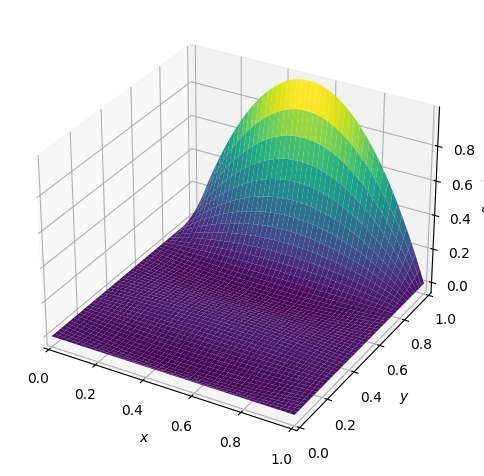

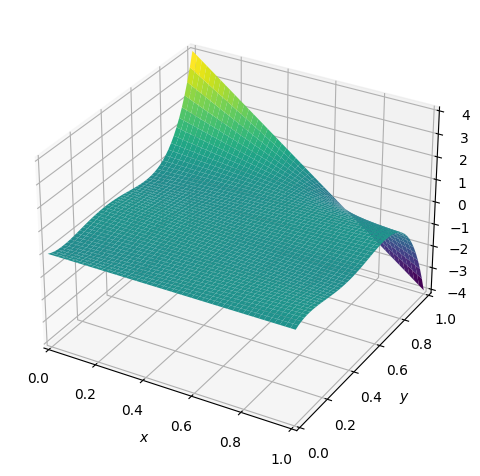

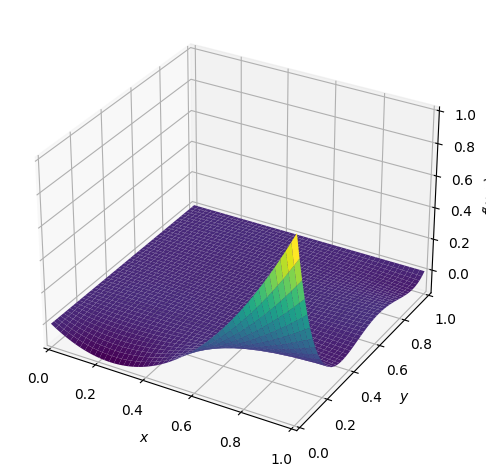

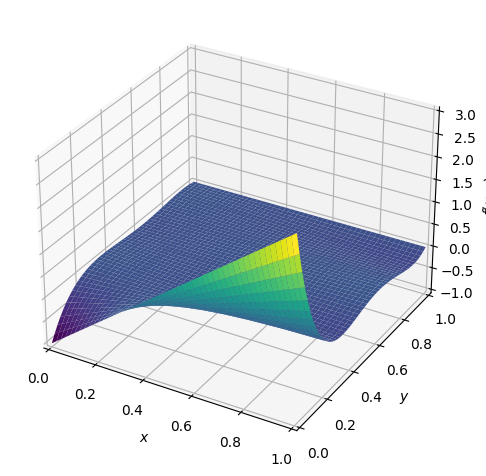

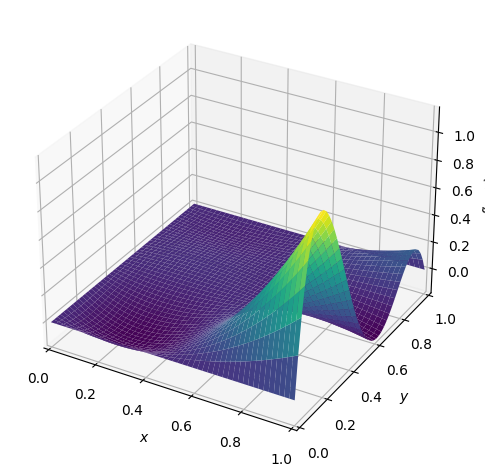

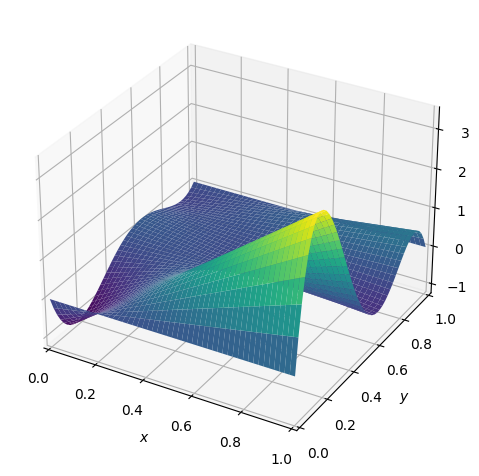

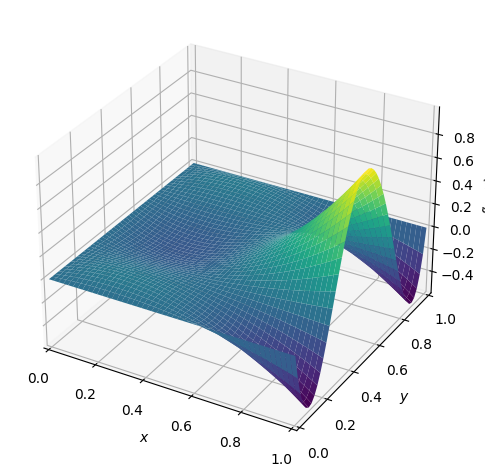

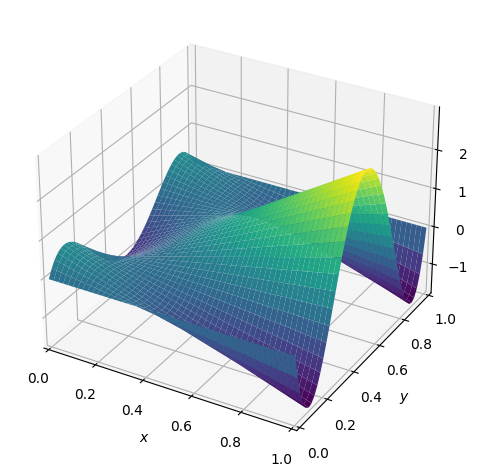

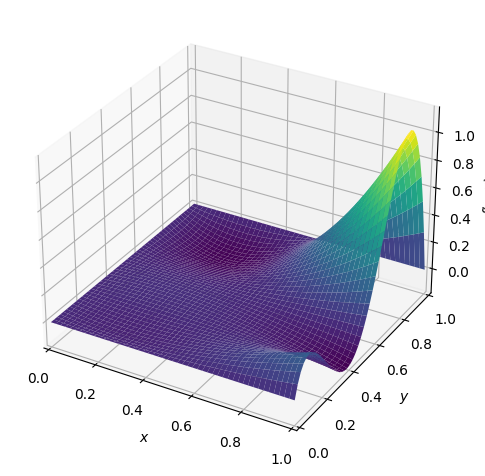

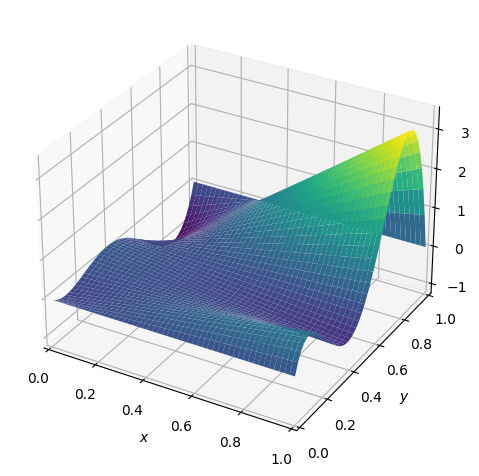

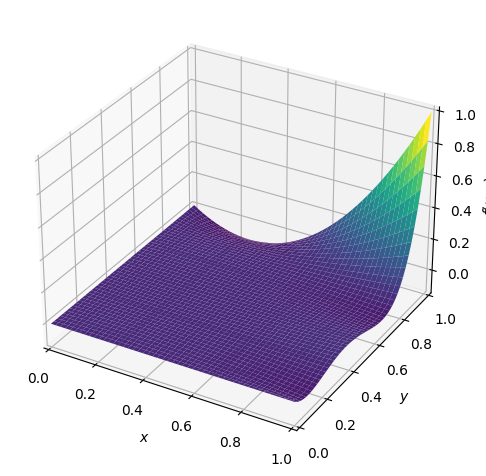

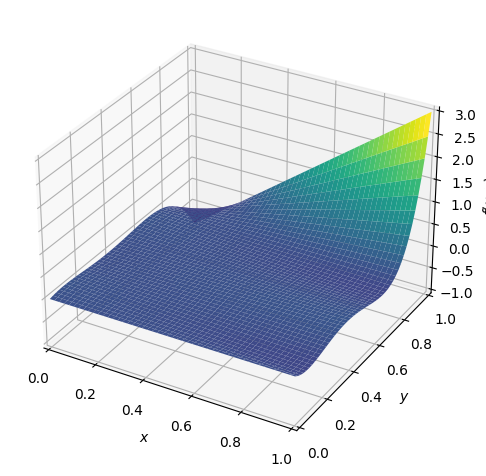

In [15]:
for pol in q_sf.values():
    plot3d(pol,(x,0,1), (y,0,1))
    plot3d(diff(pol,x),(x,0,1), (y,0,1))

### Testing numeration

In [16]:
# check if the correct nodes are == 1
#for i in range(order_y-1):
#    assert q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i} is wrong"
#    assert q_sf_velo[f"phi_{i+order_y-1}"].subs([(x,0.5), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i+order_y-1}"].subs([(x,0.5), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i+order_y-1} is wrong"
#    assert q_sf_velo[f"phi_{i+2*(order_y-1)}"].subs([(x,1), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i+2*(order_y-1)}"].subs([(x,1), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i+2*(order_y-1)} is wrong"

__________________________________________________________________________________________________________________

In [17]:
grad_q = {}
for i, sf in enumerate(q_sf.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q

In [18]:
grad_q_velo = {}
for i, sf in enumerate(q_sf_velo.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q_velo[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q_velo

## Printing in function form for script input

In [19]:
# Printing all shape functions
for sf_name, sf in q_sf.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    #print(def_header + body)

In [20]:
# Printing only velocity shape functions: leaving out the boundary shape functions
for sf_name, sf in q_sf_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    print(def_header + body)

def phi_0(x: float, y: float) -> float:
	return 1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0)
def phi_1(x: float, y: float) -> float:
	return 4.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0)
def phi_2(x: float, y: float) -> float:
	return 1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333)
def phi_3(x: float, y: float) -> float:
	return 4.0*x*y*(1 - x)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0)
def phi_4(x: float, y: float) -> float:
	return 16.0*x*y*(1 - x)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0)
def phi_5(x: float, y: float) -> float:
	return 4.0*x*y*(1 - x)*(-42.6666666666667*y**3 + 74.6666666666667*y**2 - 37.3333333333333*y + 5.33333333333333)
def phi_6(x: float, y: float) -> float:
	return x*y*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0)
def phi_7(x: float, y: float) -> float:
	return 4.0*x*y*(2.0*x - 1.0

In [21]:
# Printing all gradient shape functions
for sf_name, sf in grad_q.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    #print(def_header + body + return_str)

In [22]:
# Print velocity dof: leaving out the gradiants of shape function on the boundary
for sf_name, sf in grad_q_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    print(def_header + body + return_str)

def grad_phi_0(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = 2.0*y*(x - 1)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0) + 1.0*y*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0)
	phi_dy = 1.0*y*(x - 1)*(2.0*x - 1.0)*(-128.0*y**2 + 192.0*y - 69.3333333333333) + 1.0*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0)
	return np.array([phi_dx, phi_dy])
def grad_phi_1(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = 8.0*y*(x - 1)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0) + 4.0*y*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0)
	phi_dy = 16.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0) + 16.0*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(4.0*y - 1.0) + 4.0*y*(x - 1)*(2.0*x - 1.0)*(4.0*y - 3.0)*(4.0*y - 1.0) + 4.0*(x - 1)*(2.0*x - 1.0)*(y - 1)*(4.0*y - 3.0)*(4.0*y - 1.0)
	return np.array([phi_dx, phi_dy])
def grad_phi_2(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = 2.0*y*(x - 1)*(-42.66666666

# Checking integral

In [23]:
p_sf = {'phi_0': -2.0*x*y**2 + 3.0*x*y - 1.0*x + 2.0*y**2 - 3.0*y + 1.0,
        'phi_1': 4.0*x*y**2 - 4.0*x*y - 4.0*y**2 + 4.0*y,
        'phi_2': -2.0*x*y**2 + 1.0*x*y + 2.0*y**2 - 1.0*y,
        'phi_3': 2.0*x*y**2 - 3.0*x*y + 1.0*x,
        'phi_4': -4.0*x*y**2 + 4.0*x*y,
        'phi_5': 2.0*x*y**2 - 1.0*x*y}
p_xy = p_sf["phi_0"] - s * p_sf["phi_1"] + p_sf["phi_2"] - p_sf["phi_3"] + s * p_sf["phi_4"] - p_sf["phi_5"]
expand(p_xy)

-8.0*s*x*y**2 + 8.0*s*x*y + 4.0*s*y**2 - 4.0*s*y - 8.0*x*y**2 + 8.0*x*y - 2.0*x + 4.0*y**2 - 4.0*y + 1.0

In [24]:
p_xy = p_xy.subs([(s, 0.5)])
p_xy

-12.0*x*y**2 + 12.0*x*y - 2.0*x + 6.0*y**2 - 6.0*y + 1.0

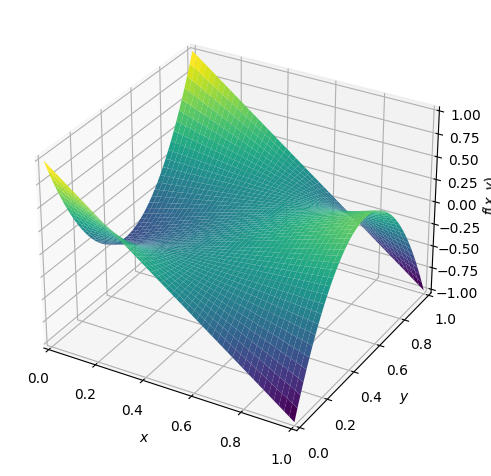

In [25]:
plot3d(p_xy, (x,0,1), (y,0,1))

In [26]:
#for i, velo_sf in enumerate(q_sf_velo.values()):
#    print(f"phi_{i}")
#    plot3d(velo_sf, (x,0,1), (y,0,1))
#    plot3d(diff(velo_sf,x), (x,0,1), (y,0,1))
#    plot3d(p_xy*diff(velo_sf, x), (x,0,1), (y,0,1))
#    print("-------------------------------------------------")

__________________________________________________________________________________________________________________

## Testing for velocity shape function at boundary

In [27]:
# x-derivative:
for i in range(order_y-1):
    integrand_left = -p_xy * diff(q_sf_velo[f"phi_{i+(order_x*(order_y-1))}"], x)
    integrand_middle = p_xy * diff(q_sf_velo[f"phi_{i}"], x)
    integral_left = integrate(integrand_left, (x, 0,1), (y,0,1))
    integral_middle = integrate(integrand_middle, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t {integral_left} + {integral_middle} = {integral_left + integral_middle}")

Integrating with velocity Shape Function 0:
	 0.0338624338623994 + -0.0338624338626659 = -2.66453525910038E-13
Integrating with velocity Shape Function 1:
	 -0.139682539682582 + 0.139682539682589 = 7.10542735760100E-15
Integrating with velocity Shape Function 2:
	 0.0338624338624225 + -0.0338624338624953 = -7.28306304154103E-14


In [28]:
# y-derivative:
for i in range(order_y-1):
    integrand_left = -p_xy * diff(q_sf_velo[f"phi_{i+(order_x*(order_y-1))}"], y)
    integrand_middle = p_xy * diff(q_sf_velo[f"phi_{i}"], y)
    integral_left = integrate(integrand_left, (x, 0,1), (y,0,1))
    integral_middle = integrate(integrand_middle, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t {integral_left} + {integral_middle} = {integral_left + integral_middle}")

Integrating with velocity Shape Function 0:
	 0.177777777777905 + 0.177777777777901 = 0.355555555555807
Integrating with velocity Shape Function 1:
	 8.52651282912120E-14 + -1.98951966012828E-13 = -1.13686837721616E-13
Integrating with velocity Shape Function 2:
	 -0.177777777777720 + -0.177777777777724 = -0.355555555555444


## Testing for velocity shape function in middle

In [29]:
# x-derivative:
for i in range(order_y-1):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i+3}"], x)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i+3}:")
    print(f"\t solution = {integral}")

Integrating with velocity Shape Function 3:
	 solution = 0.0677248677251541
Integrating with velocity Shape Function 4:
	 solution = -0.279365079365164
Integrating with velocity Shape Function 5:
	 solution = 0.0677248677249800


In [30]:
# y-derivative:
for i in range(order_y-1):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i+3}"], y)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i+3}:")
    print(f"\t solution = {integral}")

Integrating with velocity Shape Function 3:
	 solution = -2.27373675443232E-13
Integrating with velocity Shape Function 4:
	 solution = 0
Integrating with velocity Shape Function 5:
	 solution = 1.51582450295488E-13


In [31]:
# x-derivative:
if order_x == 3 and order_y == 4:
    for i in range(order_y-1):
        integrand = p_xy * diff(q_sf_velo[f"phi_{i+6}"], x)
        integral = integrate(integrand, (x, 0,1), (y,0,1))
        print(f"Integrating with velocity Shape Function {i+6}:")
        print(f"\t solution = {integral}")

In [32]:
# y-derivative:
if order_x == 3 and order_y == 4:
    for i in range(order_y-1):
        integrand = p_xy * diff(q_sf_velo[f"phi_{i+6}"], y)
        integral = integrate(integrand, (x, 0,1), (y,0,1))
        print(f"Integrating with velocity Shape Function {i+6}:")
        print(f"\t solution = {integral}")

__________________________________________________________________________________________________________________

## Simple Example on Unit Square (0,1)x(0,1)

In [33]:
# x-derivative:
for i in range((order_y-1)*(order_x+1)):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i}"], x)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t solution = {integral}")

Integrating with velocity Shape Function 0:
	 solution = -0.0338624338626659
Integrating with velocity Shape Function 1:
	 solution = 0.139682539682589
Integrating with velocity Shape Function 2:
	 solution = -0.0338624338624953
Integrating with velocity Shape Function 3:
	 solution = 0.0677248677251541
Integrating with velocity Shape Function 4:
	 solution = -0.279365079365164
Integrating with velocity Shape Function 5:
	 solution = 0.0677248677249800
Integrating with velocity Shape Function 6:
	 solution = -0.0338624338625522
Integrating with velocity Shape Function 7:
	 solution = 0.139682539682589
Integrating with velocity Shape Function 8:
	 solution = -0.0338624338623532


In [34]:
# y-derivative:
for i in range((order_y-1)*(order_x+1)):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i}"], y)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t solution = {integral}")

Integrating with velocity Shape Function 0:
	 solution = 0.177777777777901
Integrating with velocity Shape Function 1:
	 solution = -1.98951966012828E-13
Integrating with velocity Shape Function 2:
	 solution = -0.177777777777724
Integrating with velocity Shape Function 3:
	 solution = -2.27373675443232E-13
Integrating with velocity Shape Function 4:
	 solution = 0
Integrating with velocity Shape Function 5:
	 solution = 1.51582450295488E-13
Integrating with velocity Shape Function 6:
	 solution = -0.177777777777806
Integrating with velocity Shape Function 7:
	 solution = -9.23705556488130E-14
Integrating with velocity Shape Function 8:
	 solution = 0.177777777777713


__________________________________________________________________________________________________________________

## Comparing G[0,0] and the quadrature rule for one slab in the unit square

In [35]:
p_sf["phi_0"]

-2.0*x*y**2 + 3.0*x*y - 1.0*x + 2.0*y**2 - 3.0*y + 1.0

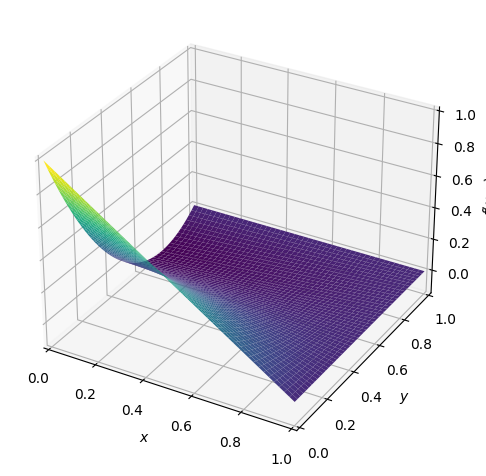

In [36]:
plot3d(p_sf["phi_0"], (x,0,1), (y,0,1))

In [49]:
assert p_sf["phi_0"].subs([(x,0), (y,0)]) == 1.0
assert p_sf["phi_0"].subs([(x,0), (y,.5)]) == 0
assert p_sf["phi_0"].subs([(x,0), (y,1)]) == 0
assert p_sf["phi_0"].subs([(x,1), (y,0)]) == 0
assert p_sf["phi_0"].subs([(x,1), (y,.5)]) == 0
assert p_sf["phi_0"].subs([(x,1), (y,1)]) == 0

In [50]:
q_sf_velo[f"phi_{0}"]

1.0*y*(x - 1)*(2.0*x - 1.0)*(-42.6666666666667*y**3 + 96.0*y**2 - 69.3333333333333*y + 16.0)

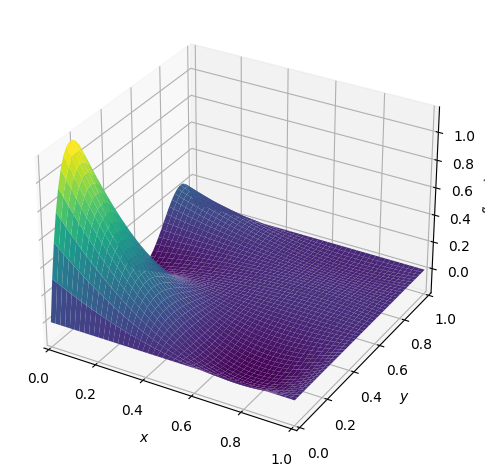

In [51]:
plot3d(q_sf_velo[f"phi_{0}"], (x,0,1), (y,0,1))

In [70]:
assert (q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[1])]) > 1-1e-10 
        and q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[1])]) < 1+1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[2])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[2])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[3])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[3])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[1])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[1])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[2])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[2])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[3])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[3])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[1])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[1])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[2])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[2])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[3])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[3])]) < 1e-10)

In [75]:
integrand = p_sf["phi_0"] * diff(q_sf_velo[f"phi_{0}"], x)
integral_sol = integrate(integrand, (x,0,1), (y,0,1))
-integral_sol

0.137566137566068

In [71]:
WEIGHTS = [
    0.317460317460320 / 4,
    0.317460317460319 / 4,
    0.555555555555555 / 4,
    0.555555555555555 / 4,
    0.555555555555555 / 4,
    0.555555555555555 / 4,
    1.142857142857139 / 4,
]

POINTS = [
    (0.5, 0.9830458915396469),
    (0.5, 0.016954108460353),
    (0.8872983346207419, 0.21132486540518702),
    (0.8872983346207419, 0.788675134594813),
    (0.11270166537925802, 0.788675134594813),
    (0.11270166537925802, 0.21132486540518702),
    (0.5, 0.5),
]

In [77]:
WEIGHTS = [0.358984421429088/4,
0.400330749583338/4,
0.245001957921212/4,
0.185989036700910/4,
0.711781890878518/4,
0.315514082613200/4,
0.611480498232472/4,
0.295643589435919/4,
0.158249356212716/4,
0.190499904161117/4,
0.526524512831510/4]

POINTS = [(0.5390238089456578, 0.942863834276723),
 (0.3529230806298629, 0.15193960467776402),
 (0.9694761384095756, 0.2832903943160435),
 (0.9413639966081451, 0.8966162194410795),
 (0.3204295002090546, 0.6178069522271405),
 (0.04875481648642399, 0.381416698788379),
 (0.7889632693081183, 0.6372541489355165),
 (0.09679962892560123, 0.8836393973538335),
 (0.12189603766199231, 0.043394581240735475),
 (0.803393943796467, 0.021048278594159475),
 (0.6186928000282739, 0.270944992469544)]

In [78]:
def test_quadrature_rule():
    integral_sum = 0
    for i, weight in enumerate(WEIGHTS):
        partial_sum = (
            weight
            * integrand.subs([(x,POINTS[i][0]), (y,POINTS[i][1])])
        )
        integral_sum += partial_sum
    integral = integral_sum
    return -integral
test_quadrature_rule()

0.132820152194232

__________________________________________________________________________________________________________________